 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whalepath = Path('Resources/whale_returns.csv')
whale_returns = pd.read_csv(whalepath)
whale_returns = pd.read_csv(whalepath, index_col = "Date")
whale_returns = whale_returns.sort_index()

whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algopath = Path('Resources/algo_returns.csv')
algo_returns = pd.read_csv(algopath)
algo_returns = pd.read_csv(algopath, index_col = "Date")
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path('Resources/sp500_history.csv')
sp500_returns = pd.read_csv(sp500_path)
sp500_returns["Date"] = pd.to_datetime(sp500_returns["Date"], format = "%d-%b-%y").dt.strftime("%Y-%m-%d")
sp500_returns = sp500_returns.set_index(sp500_returns["Date"])
sp500_returns = sp500_returns.drop(columns = ["Date"])
sp500_returns.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_returns["Close"] = sp500_returns["Close"].str.replace("$","")
sp500_returns["Close"] = sp500_returns["Close"].str.replace(",","")
sp500_returns["Close"]

/Users/nidalsinan/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [11]:
sp500_returns["Close"] = sp500_returns["Close"].astype(float)
sp500_returns.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_returns = sp500_returns.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [13]:
# Drop nulls
sp500_returns = sp500_returns.dropna().copy()
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns = {
    "Close" : "daily_return"
})

sp500_returns = sp500_returns.sort_index()
sp500_returns.head()

,daily_return
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combine_group = pd.concat([whale_returns, algo_returns, sp500_returns], axis = "columns", join = "outer")
combine_group.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily_return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

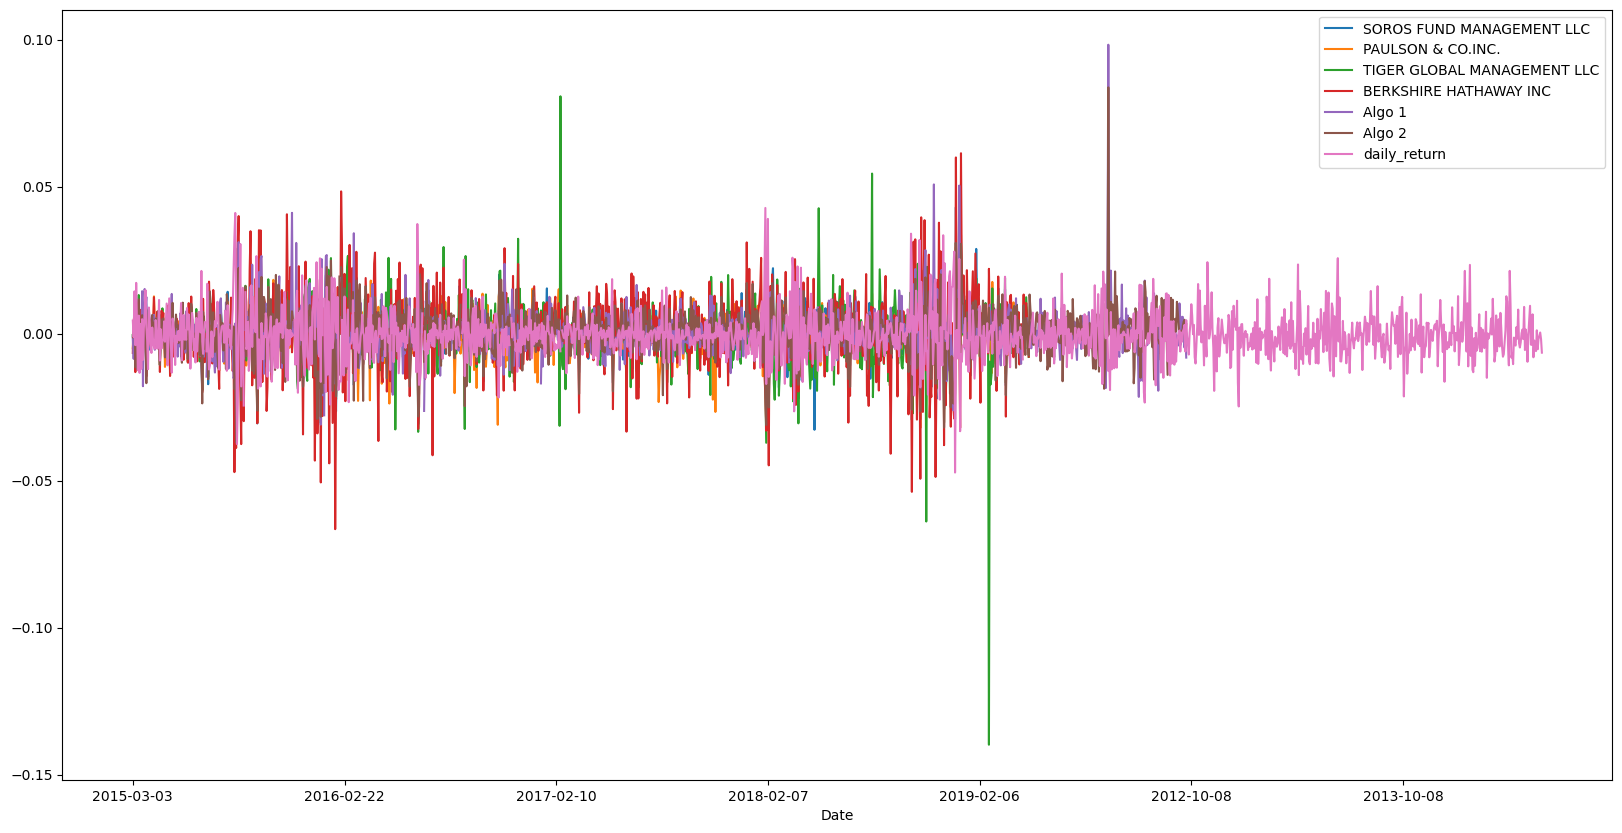

In [16]:
# Plot daily returns of all portfolios
combine_group.plot(figsize = (20,10))


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

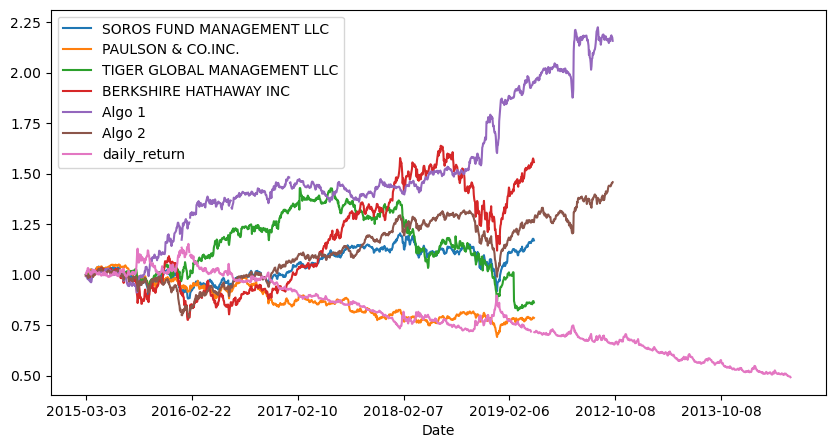

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+combine_group).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize = (10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

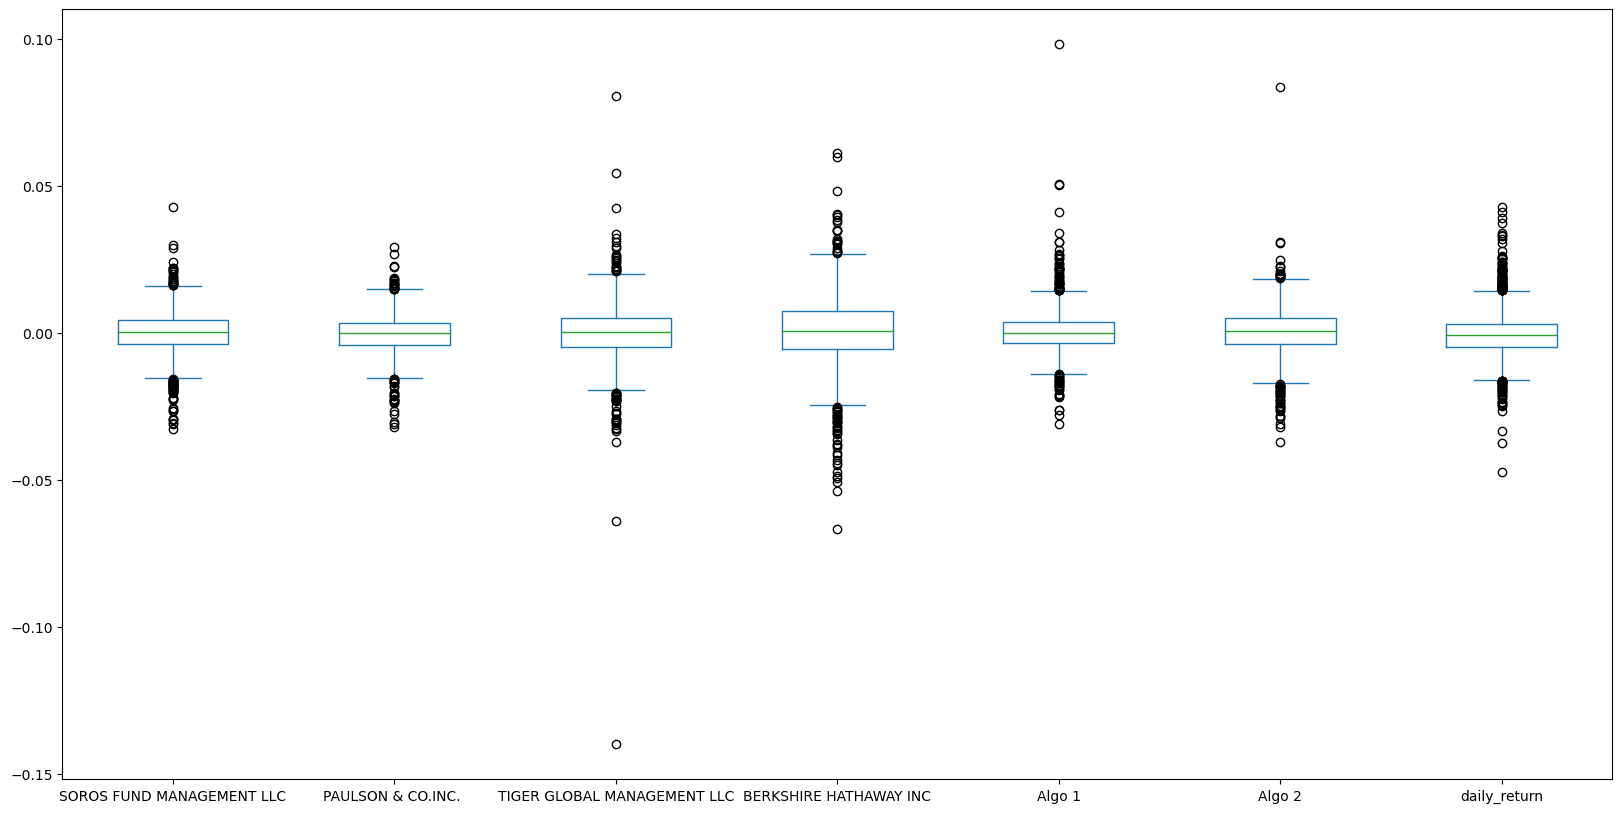

In [18]:
# Box plot to visually show risk
combine_group.plot.box(figsize = (20,10))


### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std = combine_group.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007988
Algo 2                         0.008466
daily_return                   0.008135
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
sp500_returns.std()

# Determine which portfolios are riskier than the S&P 500
risky_stock = 'The riskier stocks are Algo 2, BERKSHIRE HATHAWAY INC, TIGER GLOBAL MANAGEMENT LLC'
risky_stock

'The riskier stocks are Algo 2, BERKSHIRE HATHAWAY INC, TIGER GLOBAL MANAGEMENT LLC'

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std = daily_std * np.sqrt(252)
annualised_std

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
Algo 1                         0.126801
Algo 2                         0.134401
daily_return                   0.129133
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

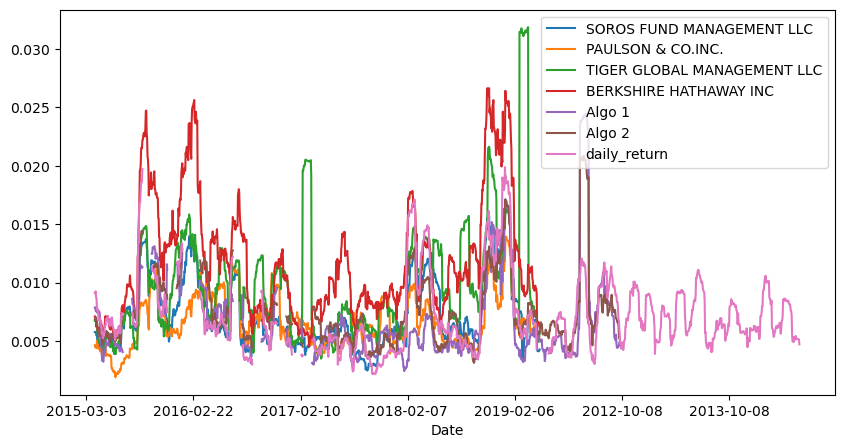

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combine_group.rolling(window=21).std()

# Plot the rolling standard deviation
combine_group.rolling(window=21).std().plot(figsize = (10,5))


### Calculate and plot the correlation

In [23]:
# Calculate the correlation

correlation = combine_group.corr()

# Display de correlation matrix

correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily_return
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308,0.321366,0.826719,0.000574
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802,0.269257,0.677993,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102,0.164840,0.508139,-0.001505
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000,0.292307,0.687717,-0.013856
Algo 1,0.321366,0.269257,0.164840,0.292307,1.000000,0.346568,-0.048003
Algo 2,0.826719,0.677993,0.508139,0.687717,0.346568,1.000000,-0.011537
daily_return,0.000574,0.013549,-0.001505,-0.013856,-0.048003,-0.011537,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

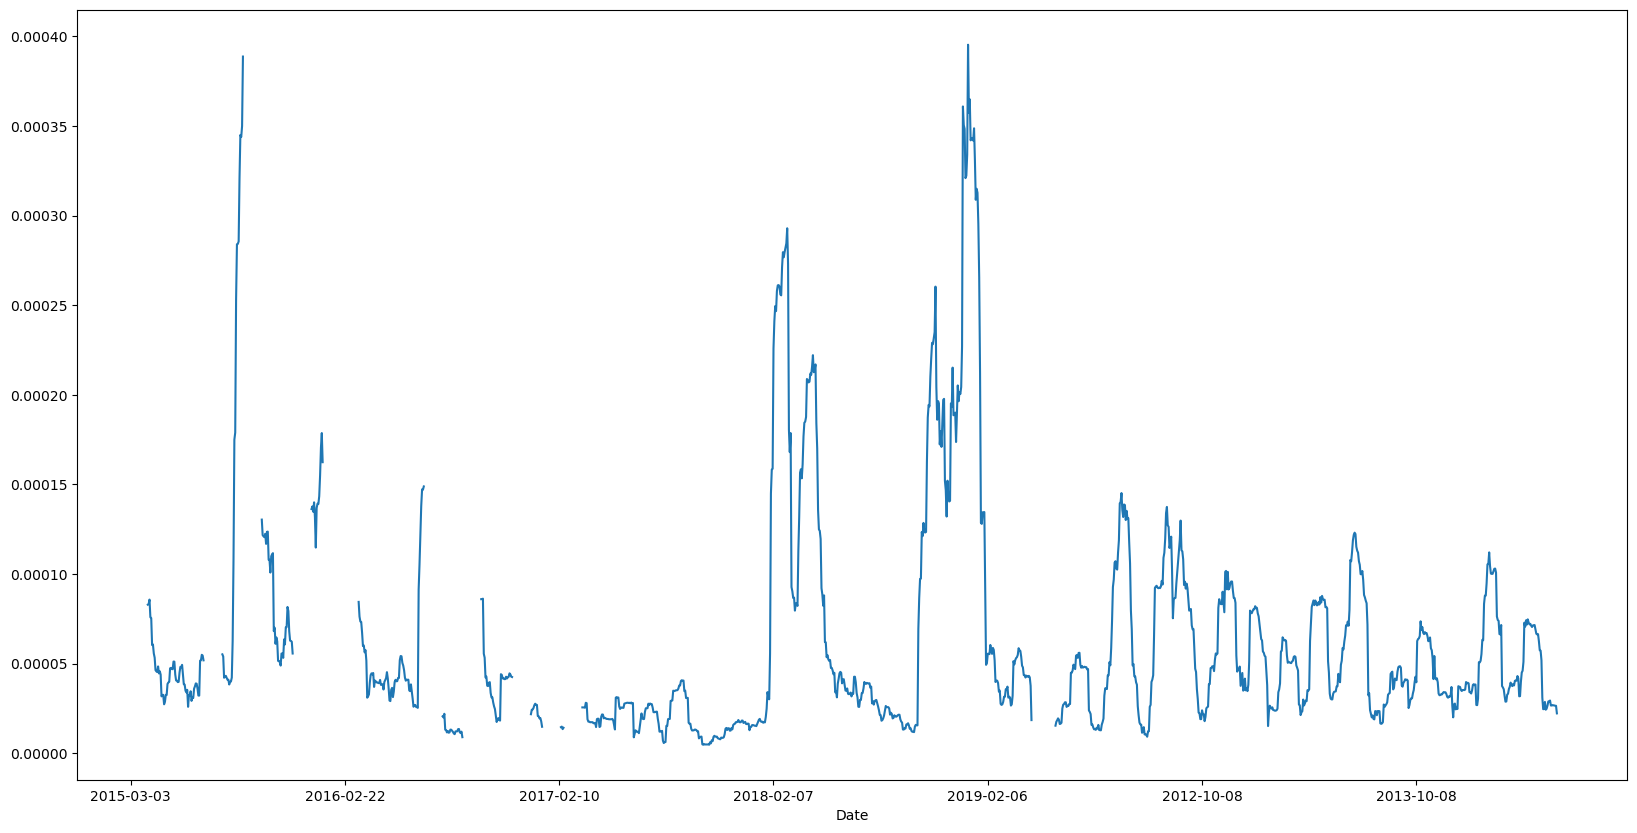

In [24]:
# Calculate covariance of a single portfolio
covariance = combine_group["Algo 1"].cov(combine_group["daily_return"])
# Calculate variance of S&P 500
variance = combine_group["daily_return"].var()
# Computing beta
algo_beta = covariance/variance
algo_beta
# Plot beta trend
rolling_beta = combine_group["daily_return"].rolling(window=21).var()
rolling_beta.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'EWM'}, xlabel='Date'>

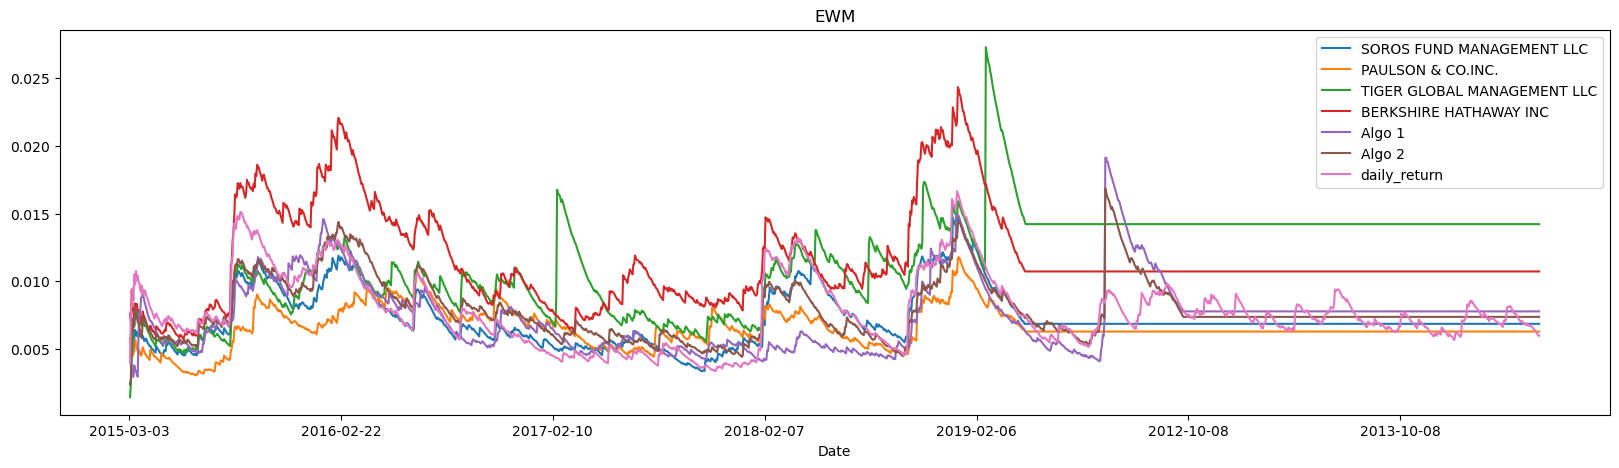

In [25]:
# Use `ewm` to calculate the rolling window
combine_group.ewm(halflife=21).std().plot(title="EWM", figsize = (20,5))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios = (combine_group.mean() * 252) / (combine_group.std() * np.sqrt(252))

<AxesSubplot:>

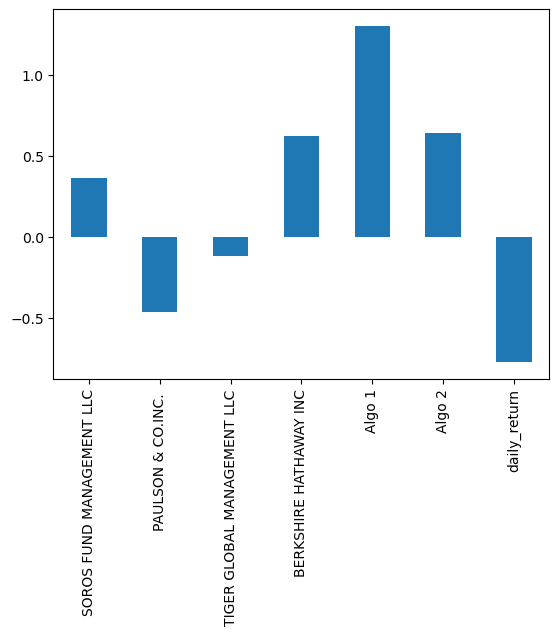

In [27]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock
jpmpath = Path('Resources/jpm.csv')
jpm_returns = pd.read_csv(jpmpath)
jpm_returns = pd.read_csv(jpmpath, index_col = "Date")
jpm_returns = jpm_returns.sort_index()
jpm_returns = jpm_returns.rename(columns = {
    "Close":"JPM"
})
jpm_returns.head()

,JPM
Date,
01/04/2014 16:00:00,60.67
01/04/2015 16:00:00,59.95
01/05/2014 16:00:00,55.72
01/05/2015 16:00:00,63.61
01/07/2014 16:00:00,57.57


In [29]:
# Reading data from 2nd stock
costcopath = Path('Resources/costco.csv')
costco_returns = pd.read_csv(costcopath)
costco_returns = pd.read_csv(costcopath, index_col = "Date")
costco_returns = costco_returns.sort_index()
costco_returns = costco_returns.rename(columns = {
    "Close":"Costco"
})
costco_returns.head()

,Costco
Date,
01/04/2014 16:00:00,111.86
01/04/2015 16:00:00,150.24
01/05/2014 16:00:00,115.56
01/05/2015 16:00:00,145.39
01/07/2014 16:00:00,115.44


In [30]:
# Reading data from 3rd stock
nvdapath = Path('Resources/nvda.csv')
nvda_returns = pd.read_csv(nvdapath)
nvda_returns = pd.read_csv(nvdapath, index_col = "Date")
nvda_returns = nvda_returns.sort_index()
nvda_returns = nvda_returns.rename(columns = {
    "Close":"NVDA"
})
nvda_returns.head()

,NVDA
Date,
01/04/2014 16:00:00,4.66
01/04/2015 16:00:00,5.25
01/05/2014 16:00:00,4.64
01/05/2015 16:00:00,5.69
01/07/2014 16:00:00,4.69


In [31]:
# Combine all stocks in a single DataFrame
 
combine_custom = pd.concat([costco_returns, nvda_returns, jpm_returns], axis = "columns", join = "outer")
combine_custom.head()

,Costco,NVDA,JPM
Date,,,
01/04/2014 16:00:00,111.86,4.66,60.67
01/04/2015 16:00:00,150.24,5.25,59.95
01/05/2014 16:00:00,115.56,4.64,55.72
01/05/2015 16:00:00,145.39,5.69,63.61
01/07/2014 16:00:00,115.44,4.69,57.57


In [32]:
# Reset Date index
combine_custom = combine_custom.reset_index()
combine_custom['Date']= pd.to_datetime(combine_custom['Date'])
combine_custom['Date'] = combine_custom['Date'].dt.strftime('%Y-%m-%d')
combine_custom = combine_custom.set_index(combine_custom['Date'])
combine_custom = combine_custom.drop(columns = ["Date"])
combine_custom.head()

,Costco,NVDA,JPM
Date,,,
2014-01-04,111.86,4.66,60.67
2015-01-04,150.24,5.25,59.95
2014-01-05,115.56,4.64,55.72
2015-01-05,145.39,5.69,63.61
2014-01-07,115.44,4.69,57.57


In [33]:
# Calculate daily returns
custom_daily = combine_custom.pct_change()
# Drop NAs
custom_daily = custom_daily.dropna().copy()
custom_daily.isnull().sum()
# Display sample data
custom_daily.head()

,Costco,NVDA,JPM
Date,,,
2015-01-04,0.343107,0.126609,-0.011867
2014-01-05,-0.230831,-0.116190,-0.070559
2015-01-05,0.258134,0.226293,0.141601
2014-01-07,-0.205998,-0.175747,-0.094954
2014-01-08,0.021137,-0.057569,-0.018933


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns = custom_daily.dot(weights)

# Display sample data
custom_portfolio_returns.head()

Date
2015-01-04    0.152616
2014-01-05   -0.139193
2015-01-05    0.208676
2014-01-07   -0.158899
2014-01-08   -0.018455
dtype: float64

In [35]:
custom_portfolio_returns.dtypes

dtype('float64')

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([combine_group, custom_daily], axis = "columns", join = "outer")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily_return,Costco,NVDA,JPM
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,0.273175,0.214442,0.102473
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN,NaN,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN,NaN,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN,NaN,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN,NaN,NaN


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns = all_returns.dropna().copy()
all_returns.isnull().sum()
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily_return,Costco,NVDA,JPM
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,0.273175,0.214442,0.102473
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353,0.304781,0.282167,0.062348
2015-03-16,0.007901,0.003583,0.007953,0.008055,-0.003395,0.004117,0.003331,0.073504,0.150301,0.105847
2015-03-17,0.002142,0.002928,-0.000687,0.000384,-0.002822,0.001274,-0.012012,0.322316,0.302691,0.069990
2015-03-18,0.009603,0.007513,0.009557,0.007854,0.014429,0.006269,0.004896,0.325692,0.254386,0.063555


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`
all_std_daily = all_returns.std()

all_annual_std = all_std_daily * np.sqrt(252)
all_annual_std

SOROS FUND MANAGEMENT LLC      0.101118
PAULSON & CO.INC.              0.075704
TIGER GLOBAL MANAGEMENT LLC    0.109386
BERKSHIRE HATHAWAY INC         0.164035
Algo 1                         0.130229
Algo 2                         0.110386
daily_return                   0.134519
Costco                         1.959220
NVDA                           1.536043
JPM                            1.300300
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

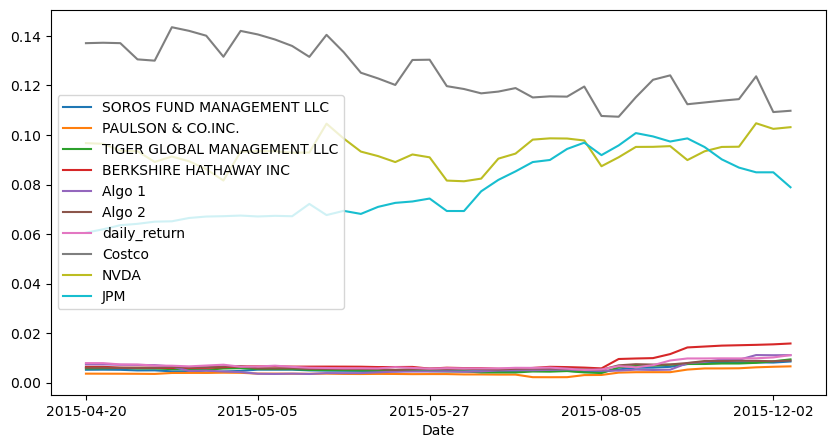

In [50]:
# Calculate rolling standard deviation

all_returns.rolling(window=21).std()

# Plot rolling standard deviation

all_returns.rolling(window=21).std().plot(figsize = (10,5))


### Calculate and plot the correlation

<AxesSubplot:>

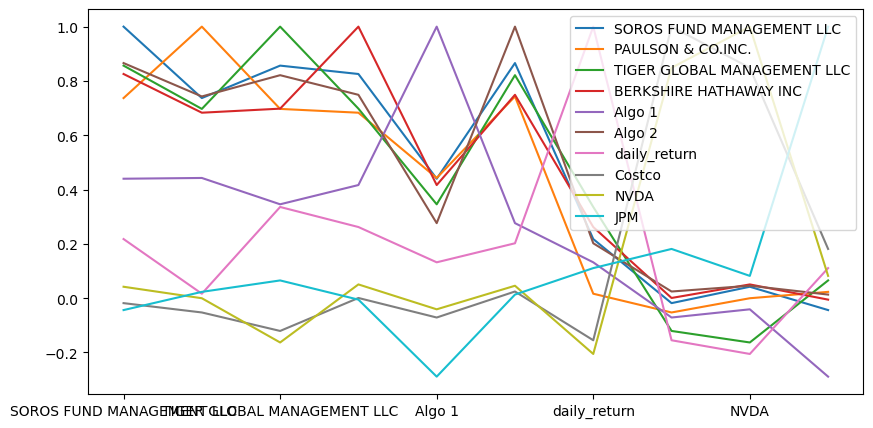

In [53]:
# Calculate and plot the correlation
all_correlation = all_returns.corr()
all_correlation.plot(figsize = (10,5))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

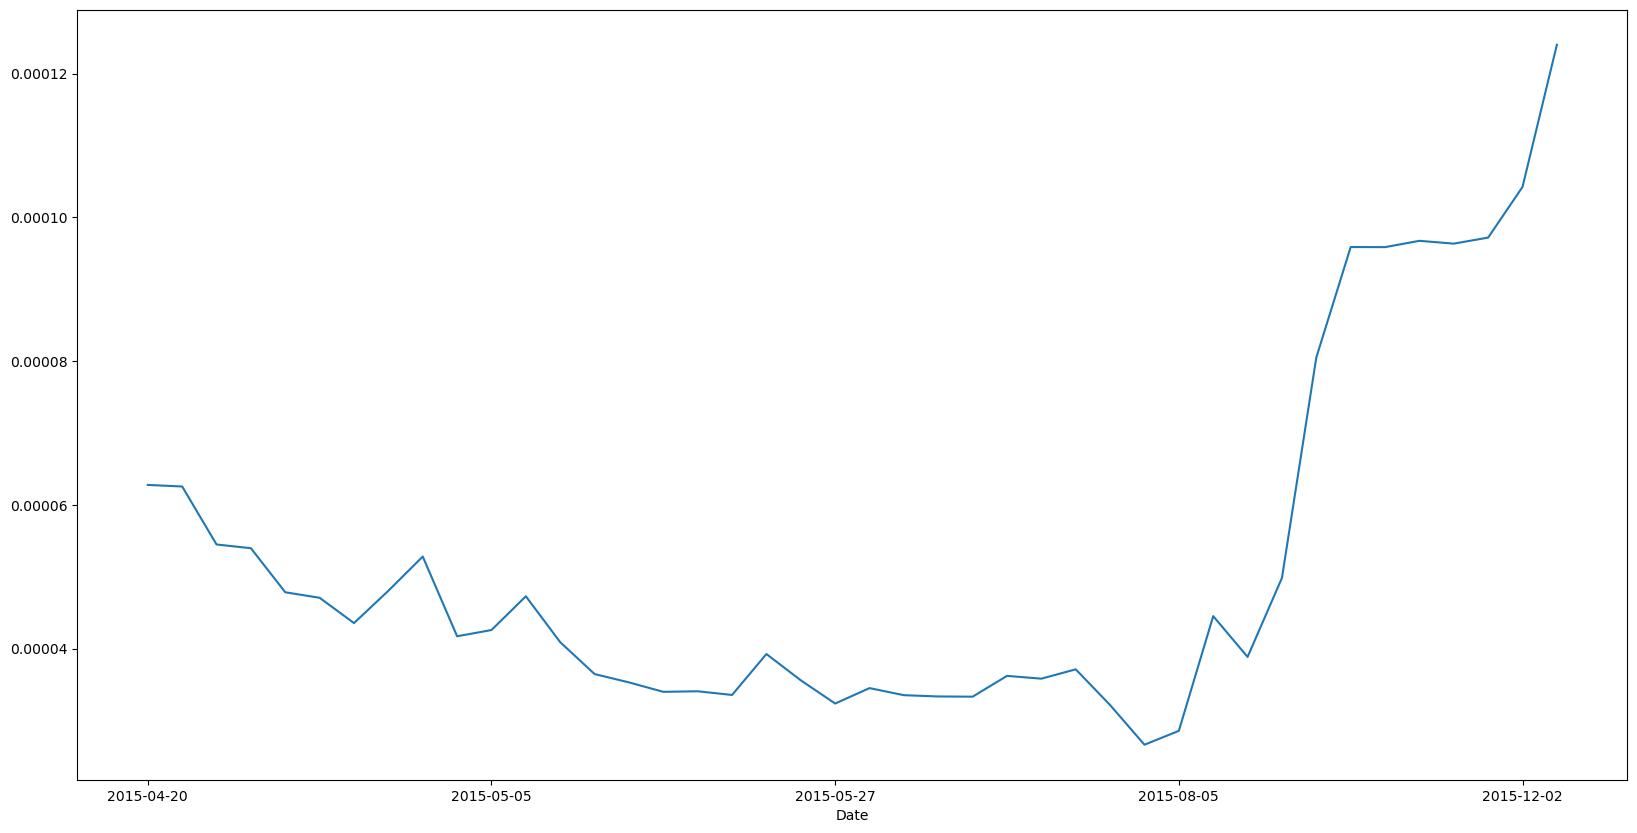

In [54]:
# Calculate and plot Beta
rolling_beta = all_returns["daily_return"].rolling(window=21).var()
rolling_beta.plot(figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [57]:
# Calculate Annualized Sharpe Ratios
all_sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252)) 

<AxesSubplot:>

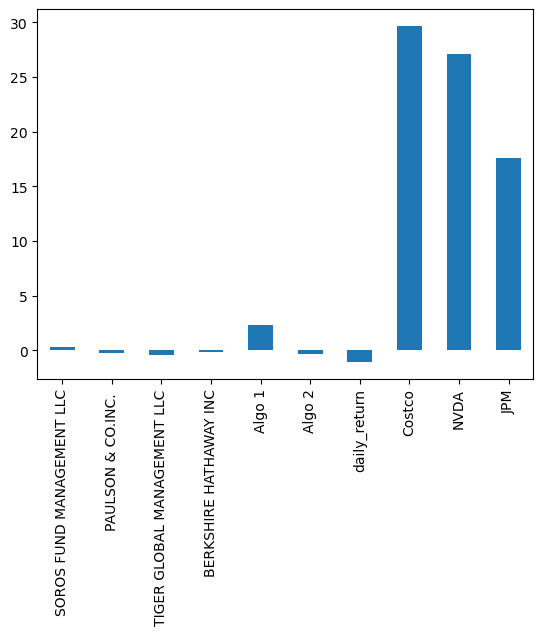

In [58]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind="bar")

### How does your portfolio do?

Write your answer here!